<a href="https://colab.research.google.com/github/Henil21/Intro_to_computer_vision_and_CNN/blob/main/Multiclass_classification_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


--2022-11-13 08:04:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.128, 142.250.145.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  41.2MB/s    in 13s     

2022-11-13 08:04:38 (37.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [3]:
import os

for folderpath, subfolder, filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(subfolder)}subfolder with {len(filenames)} images in {folderpath} ")
  

there are 2subfolder with 0 images in 10_food_classes_all_data 
there are 10subfolder with 0 images in 10_food_classes_all_data/train 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/hamburger 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/steak 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/chicken_wings 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/chicken_curry 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/ice_cream 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/sushi 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/fried_rice 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/ramen 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/pizza 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/grilled_salmon 
there are 10subfolder with 0 images in 10_food_

In [4]:
import pathlib
import numpy as np
data_dir=pathlib.Path("/content/10_food_classes_all_data/train")
class_name=np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class_name from the subdirectories
print(class_name)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_images(target_dir,target_class):
  target=target_dir+target_class
  img=random.sample(os.listdir(target),1)
  print(img)
  image=mpimg.imread(target+'/'+img[0])
  plt.imshow(image)
  print(f"img shape:{image.shape}")
  plt.axis("off")
  print(target)
  return img

['3543883.jpg']
img shape:(512, 512, 3)
10_food_classes_all_data/train/sushi


['3543883.jpg']

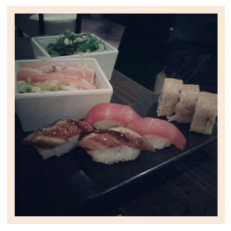

In [6]:
import random
view_random_images(target_dir='10_food_classes_all_data/train/',
                   target_class=random.choice(class_name))

In [7]:
train='10_food_classes_all_data/train'
test='10_food_classes_all_data/test'


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1/225)
test_datagen= ImageDataGenerator(rescale=1/225)


train_data=train_datagen.flow_from_directory(train,
                                             target_size=(224,224),
                                             batch_size=(32),
                                             class_mode='categorical')
test_data=train_datagen.flow_from_directory(test,
                                             target_size=(224,224),
                                             batch_size=(32),
                                             class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D,Conv2D , Flatten ,Dense
from tensorflow.keras.optimizers import Adam

model=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=['accuracy'])
history=model.fit(train_data,
          epochs=5,
          steps_per_epoch=len(train_data),
          validation_data=(test_data),
          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 55s 201ms/step - loss: 2.1295 - accuracy: 0.2280 - val_loss: 1.9384 - val_accuracy: 0.3216
Epoch 2/5
235/235 [==============================] - 45s 192ms/step - loss: 1.8340 - accuracy: 0.3667 - val_loss: 1.8267 - val_accuracy: 0.3504
Epoch 3/5
235/235 [==============================] - 45s 193ms/step - loss: 1.6593 - accuracy: 0.4396 - val_loss: 1.8399 - val_accuracy: 0.3688
Epoch 4/5
235/235 [==============================] - 45s 192ms/step - loss: 1.4873 - accuracy: 0.4971 - val_loss: 1.8367 - val_accuracy: 0.3696
Epoch 5/5
235/235 [==============================] - 45s 193ms/step - loss: 1.2900 - accuracy: 0.5656 - val_loss: 2.0172 - val_accuracy: 0.3548


In [10]:
def plot_loss_curves(history):
  """
  return separate loss curves for traning and validation metrics
  """
  loss= history.history['loss']
  val_loss=history.history['val_loss']
  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']
  # how many epoch we run
  epoch=range(len(history.history["loss"]))
  plt.plot(epoch,loss,label="traning_loss")
  plt.plot(epoch,val_loss,label="val_loss")
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()


  plt.figure()
   
  plt.plot(epoch,accuracy,label="accuracy")
  plt.plot(epoch,val_accuracy,label="val_accuracy")
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

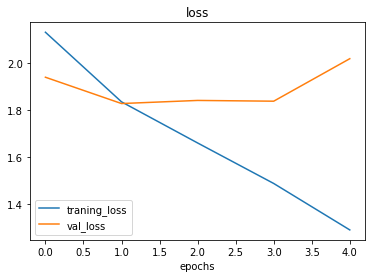

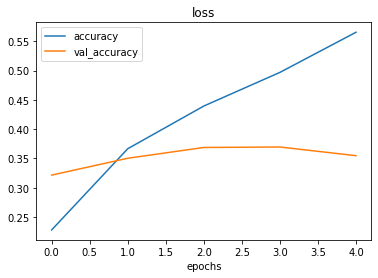

In [11]:
plot_loss_curves(history)

>**oh! our model is overfitting lets fix it**

In [12]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            #  rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [13]:
import tensorflow as tf

In [14]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 112s 476ms/step - loss: 2.1821 - accuracy: 0.1927 - val_loss: 1.9790 - val_accuracy: 0.2972
Epoch 2/5
235/235 [==============================] - 111s 473ms/step - loss: 2.0335 - accuracy: 0.2843 - val_loss: 1.8636 - val_accuracy: 0.3524
Epoch 3/5
235/235 [==============================] - 112s 477ms/step - loss: 1.9800 - accuracy: 0.3069 - val_loss: 1.9009 - val_accuracy: 0.3296
Epoch 4/5
235/235 [==============================] - 113s 479ms/step - loss: 1.9434 - accuracy: 0.3263 - val_loss: 1.8423 - val_accuracy: 0.3712
Epoch 5/5
235/235 [==============================] - 115s 489ms/step - loss: 1.9228 - accuracy: 0.3328 - val_loss: 1.7960 - val_accuracy: 0.3532


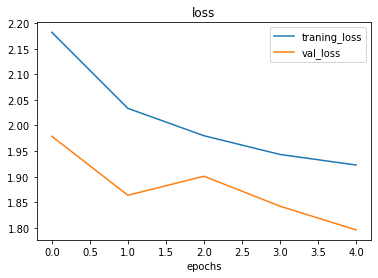

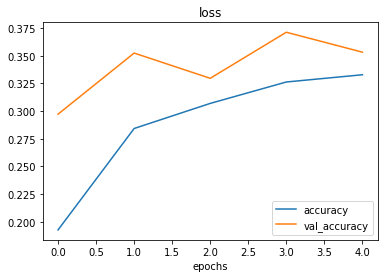

In [15]:
plot_loss_curves(history_11)

In [16]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [17]:
import tensorflow as tf
def load_prep_img(filename,img_shape=224):
  """
  Reads an image from filename  turns it into 
  tensor and reshapes it tp(img_shape,img_shape,colour_channel)
  """ 
  # read in the image
  img=tf.io.read_file(filename)
  # Decode the read file into a tensor
  img=tf.image.decode_image(img)
  # resize the image
  img=tf.image.resize(img,size=[img_shape,img_shape])
  # Rescale the image (get all values between 0 and 1)
  img=img/225
  return img

In [18]:
import matplotlib.pyplot as plt
import tensorflow as tf
def pred_and_plot(model,filename,class_name=class_name):
    """
    Imports an image locate at filename ,make a prediction with model
    and plot the images with the predicted class as title
    """
  #  import the target image and preprocess it
    img=load_prep_img(filename)

  #  Add in logic for multi-class & get pred_class name
    pred=model.predict(tf.expand_dims(img,axis=0))

    if len(pred[0])>1:
       pred_class=class_name[tf.argmax(pred[0])]
    else:
       pred_class=class_name[int(tf.round(pred[0]))]
         
    print(pred[0])


  # make a prediction
    pred_class=class_name[int(tf.round(pred))]
  #  plot the image and predicted class
    plt.imshow(img)
    plt.title(f"prediction:{pred_class}")
    plt.axis(False);

In [19]:
class_name

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

1/1 [==============================] - 0s 74ms/step


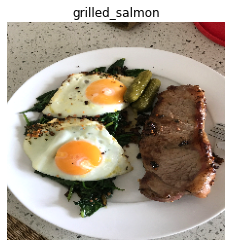

In [21]:
# pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)
# Load in and preprocess our custom image
img = load_prep_img("03-steak.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_name[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);